# Import Library

In [95]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import matplotlib.image as mpig
from keras_preprocessing.image import ImageDataGenerator

# Read Data

In [96]:
train_path = r'./../PAKB/data/train'
test_path = r'./../PAKB/data/test'
val_path = r'./../PAKB/data/val' 

# Augmented Data

In [97]:
IMG_PATH='data'
train_datagen = ImageDataGenerator(
    IMG_PATH,
    rescale=1./255, 
    rotation_range = 0.45,
    width_shift_range= 0.2,
    height_shift_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip=True,
    fill_mode = 'nearest'
)

test_datagen = ImageDataGenerator(
    IMG_PATH,
    rescale=1./255
)


# Load Data

In [98]:
train_generator = train_datagen.flow_from_directory(
    train_path,
    seed = 1000,
    target_size = (40,40), #Reshape
    shuffle=True,
    batch_size = 128,
    class_mode ='binary'
    
)

test_generator = test_datagen.flow_from_directory(
    test_path,
    seed = 1000,
    target_size = (40,40),#Reshape
    shuffle=True,
    batch_size = 128,
    class_mode ='binary'
    
)

val_generator = test_datagen.flow_from_directory(
   val_path,
    seed = 1000,
    target_size = (40,40), #Reshape
    shuffle=True,
    batch_size = 128,
    class_mode ='binary'
    
)


Found 8643 images belonging to 2 classes.
Found 578 images belonging to 2 classes.
Found 2304 images belonging to 2 classes.


In [99]:
img, label = train_generator.next()


# Visualisasi Data

(128, 40, 40, 3)


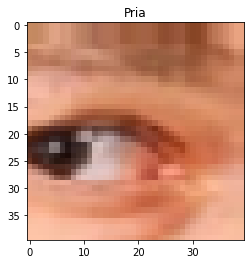

(128, 40, 40, 3)


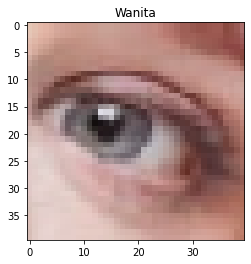

(128, 40, 40, 3)


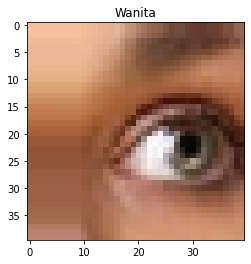

(128, 40, 40, 3)


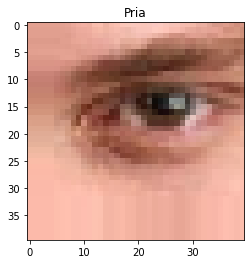

(128, 40, 40, 3)


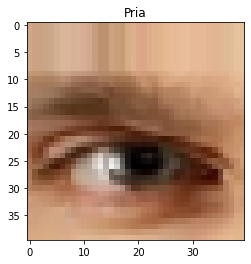

In [100]:
for _ in range(5):
    img, label = train_generator.next()
    print(img.shape)   #  (1,256,256,3)
    plt.imshow(img[0])
    if(label[0] == 0.0):
        plt.title("Wanita")
    else:
        plt.title("Pria")
    plt.show()

# Modelling Data

## Arsitektur Model

In [137]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=[40,40,3]),
    tf.keras.layers.MaxPooling2D(3,3),
    
    tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(3,3),
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'), #tambahkan layer biar akurasinya naik
    tf.keras.layers.Dense(1, activation='sigmoid') #2 class wanita pria
])

In [138]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_25 (Conv2D)          (None, 38, 38, 16)        448       
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 12, 12, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 10, 10, 16)        2320      
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 3, 3, 16)         0         
 g2D)                                                            
                                                                 
 flatten_11 (Flatten)        (None, 144)               0         
                                                                 
 dense_26 (Dense)            (None, 32)              

## Compiling Model

In [139]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',
metrics=['accuracy'])

## Modelling Epoch

In [140]:
hasil = model.fit(train_generator, epochs=40, validation_data=val_generator) #overfitting itu saat nilai akurasi dengan val akurasinya nilainya beda jauh

Epoch 1/40
68/68 [==============================] - 159s 2s/step - loss: 0.6877 - accuracy: 0.5530 - val_loss: 0.6784 - val_accuracy: 0.5486
Epoch 2/40
68/68 [==============================] - 16s 231ms/step - loss: 0.6729 - accuracy: 0.5813 - val_loss: 0.6525 - val_accuracy: 0.6341
Epoch 3/40
68/68 [==============================] - 16s 230ms/step - loss: 0.6410 - accuracy: 0.6295 - val_loss: 0.6355 - val_accuracy: 0.6298
Epoch 4/40
68/68 [==============================] - 16s 229ms/step - loss: 0.6172 - accuracy: 0.6527 - val_loss: 0.6026 - val_accuracy: 0.6806
Epoch 5/40
68/68 [==============================] - 16s 231ms/step - loss: 0.5979 - accuracy: 0.6774 - val_loss: 0.5438 - val_accuracy: 0.7257
Epoch 6/40
68/68 [==============================] - 16s 229ms/step - loss: 0.5814 - accuracy: 0.6944 - val_loss: 0.4925 - val_accuracy: 0.7791
Epoch 7/40
68/68 [==============================] - 16s 241ms/step - loss: 0.5665 - accuracy: 0.7087 - val_loss: 0.4926 - val_accuracy: 0.7626
E

## Bandingkan Perkembangan Epoch

In [141]:
y_acc_train = hasil.history['accuracy']
y_acc_val = hasil.history['val_accuracy']
y_loss_train = hasil.history['loss']
y_loss_val = hasil.history['val_loss']
x = range(len(y_acc_train))

Text(0, 0.5, 'loss')

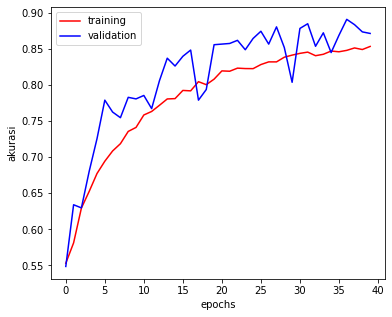

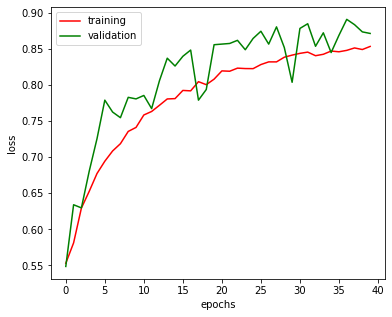

In [142]:
plt.figure(1, figsize=(6,5))
plt.plot(x,y_acc_train, c='r', label =  'training')
plt.plot(x,y_acc_val, c='b', label =  'validation')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('akurasi')

plt.figure(2, figsize=(6,5))
plt.plot(x,y_acc_train, c='r', label =  'training')
plt.plot(x,y_acc_val, c='g', label =  'validation')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')

## Evaluasi Test Set

In [143]:
model.evaluate(test_generator)

5/5 [==============================] - 5s 1s/step - loss: 0.2684 - accuracy: 0.8910


[0.26844653487205505, 0.8910034894943237]

## Testing Data

In [144]:
def predict_image(image_path):
    img = keras.preprocessing.image.load_img(image_path, target_size=[40,40])
    img_array = keras.preprocessing.image.img_to_array(img)

    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)
    score = predictions[0]
    print("This image is %.2f percent female and %.2f percent male." % (100 * (1 - score), 100 * score))
    plt.imshow(img);

1/1 [==============================] - 0s 152ms/step
This image is 0.00 percent female and 100.00 percent male.


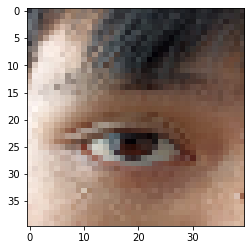

In [145]:
predict_image("mata alan.jpeg") 

1/1 [==============================] - 0s 23ms/step
This image is 0.00 percent female and 100.00 percent male.


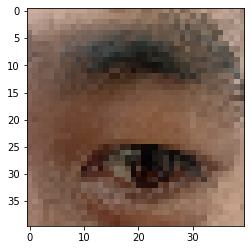

In [146]:
predict_image("mata ghozali.jpeg")

1/1 [==============================] - 0s 35ms/step
This image is 100.00 percent female and 0.00 percent male.


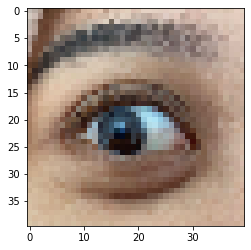

In [147]:
predict_image("mata mita.jpeg")

1/1 [==============================] - 0s 31ms/step
This image is 100.00 percent female and 0.00 percent male.


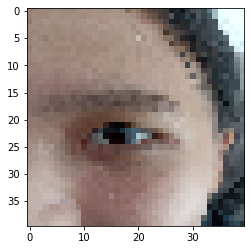

In [148]:
predict_image("mata mira.jpeg")

1/1 [==============================] - 0s 38ms/step
This image is 100.00 percent female and 0.00 percent male.


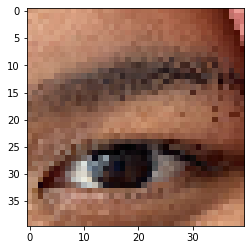

In [149]:
predict_image("mata fathia.jpeg")

1/1 [==============================] - 0s 25ms/step
This image is 100.00 percent female and 0.00 percent male.


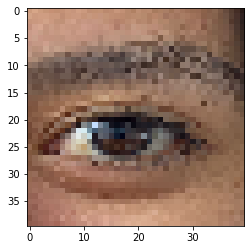

In [150]:
predict_image("mata cantika.jpeg")

1/1 [==============================] - 0s 24ms/step
This image is 100.00 percent female and 0.00 percent male.


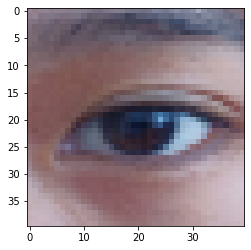

In [151]:
predict_image("mata hera.jpeg")

In [135]:
model.save("./model/model_finished")
model.save("./model/model_finished.h5")

INFO:tensorflow:Assets written to: ./model/model_finished\assets


INFO:tensorflow:Assets written to: ./model/model_finished\assets
